### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.regularizers import l2

In [6]:
x = np.load("final_x.npy")
y = np.load("final_y.npy")
x_project = np.load("Xtest_Classification1.npy")

print(x.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

(9376, 28, 28, 3)
(9376, 2)


Epoch 1/10
118/118 [==============================] - 17s 130ms/step - loss: 1.0695 - accuracy: 0.6227 - val_loss: 0.9424 - val_accuracy: 0.7020
Epoch 2/10
118/118 [==============================] - 15s 130ms/step - loss: 0.8397 - accuracy: 0.7243 - val_loss: 0.8723 - val_accuracy: 0.6183
Epoch 3/10
118/118 [==============================] - 14s 120ms/step - loss: 0.7418 - accuracy: 0.7488 - val_loss: 0.7422 - val_accuracy: 0.7031
Epoch 4/10
118/118 [==============================] - 14s 121ms/step - loss: 0.6857 - accuracy: 0.7623 - val_loss: 0.6422 - val_accuracy: 0.7607
Epoch 5/10
118/118 [==============================] - 16s 137ms/step - loss: 0.6320 - accuracy: 0.7735 - val_loss: 0.5855 - val_accuracy: 0.8033
Epoch 6/10
118/118 [==============================] - 17s 141ms/step - loss: 0.5857 - accuracy: 0.7987 - val_loss: 0.5920 - val_accuracy: 0.8022
Epoch 7/10
118/118 [==============================] - 18s 150ms/step - loss: 0.5616 - accuracy: 0.8051 - val_loss: 0.5572 - val_ac

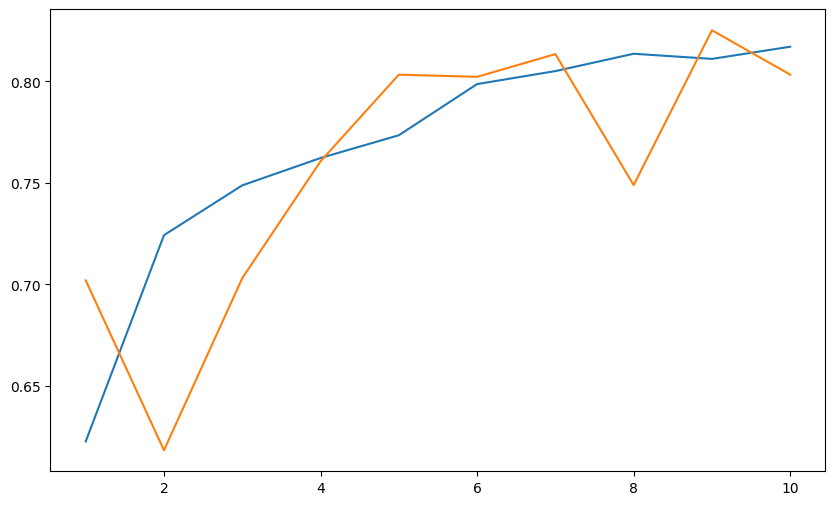

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(5, 5), padding="same", input_shape=(28, 28, 3), kernel_initializer="he_uniform", kernel_regularizer=l2(0.0013)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Conv2D(64, kernel_size=(5, 5), padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(0.0013)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Dropout(0.30),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(0.0013)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Dropout(0.40),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(2, activation="sigmoid"),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose = 3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Extract accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)

#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [8]:
y_predi = model.predict(X_test)

for i in y_predi:
    if i[0]>i[1]:
        i[0]=1
        i[1]=0
    else:
        i[0]=0
        i[1]=1
        
print(y_predi[:,0])

59/59 [==============================] - 1s 16ms/step
[1. 0. 1. ... 1. 1. 0.]


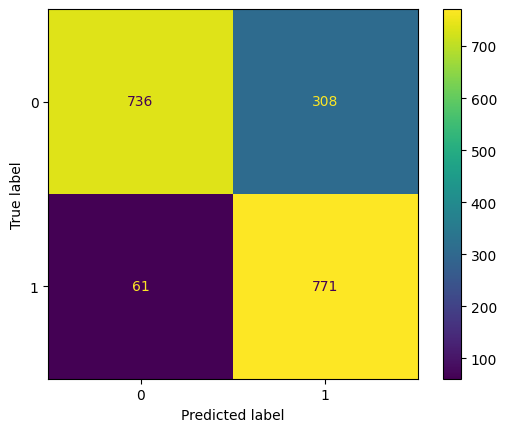

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_predi[:,0],y_test[:,0])
cm_display=ConfusionMatrixDisplay(cm).plot()